In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [17]:
# Params
freq_mhz = 6000  # MHz
freq = freq_mhz * 1e6  # Hz
c = 3e8
wavelength = c / freq
k = 2 * np.pi / wavelength
d = wavelength/2  # spacing in wavelengths
beam_angle = np.pi/2
n_ports = 20

# Ports dataset
ports = np.array(list(range(1,n_ports+1)))
rx_gain_db_distorted = np.array([-18, -19.5, -20.0, -22.5, -14.2]*(n_ports//5))  # Random Gain distortion in dB
rx_gain_db_ideal = np.zeros(n_ports)
rx_phase_drift_deg = np.array([7.8, 14.39, -10.78, -13.2, 10.22]*(n_ports//5))  # Random phase distortion (deviation) in degrees


In [18]:
# Convert Gain from dB to linear
rx_gain_linear_distorted = 10 ** (rx_gain_db_distorted / 20)
rx_gain_linear_ideal = 10 ** (rx_gain_db_ideal / 20)

# Assume ideal commanded phase is 0, so drift = actual phase
rx_phase_rad_distorted = np.deg2rad(rx_phase_drift_deg)
rx_phase_rad_ideal = np.zeros(n_ports)
for i in range(n_ports):
    rx_phase_rad_ideal[i] = -i*k*d*np.cos(beam_angle)
    rx_phase_rad_distorted[i] += -i*k*d*np.cos(beam_angle)

# Port positions (linear array along x-axis)
port_positions_x = np.arange(len(ports)) - (len(ports)-1)/2

theta = np.linspace(0, np.pi, 1000)

# Array Factor Calculation
AF = np.zeros_like(theta, dtype=complex)
for idx, x_pos in enumerate(port_positions_x):
    AF += rx_gain_linear_distorted[idx] * np.exp(1j *( k * d * x_pos * np.cos(theta) + rx_phase_rad_distorted[idx]))

AF2 = np.zeros_like(theta, dtype=complex)
for idx, x_pos in enumerate(port_positions_x):
    AF2 += rx_gain_linear_ideal[idx] * np.exp(1j * (rx_phase_rad_ideal[idx] + k * d * x_pos * np.cos(theta)))

# Normalization
AF_db = 20 * np.log10(np.abs(AF) / np.max(np.abs(AF)))
AF_db2 = 20 * np.log10(np.abs(AF2) / np.max(np.abs(AF2)))
len(AF)

1000

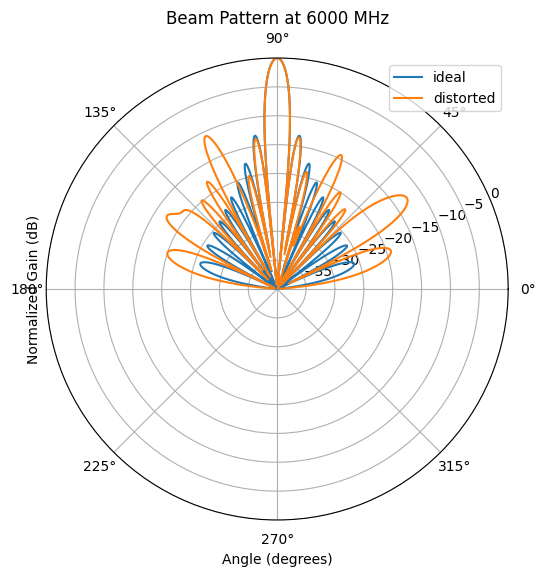

In [19]:

# Plot
plt.figure(figsize=(10,6))
plt.polar(theta, AF_db2, label='ideal')
plt.polar(theta, AF_db,  label='distorted')
plt.legend()
plt.title(f'Beam Pattern at {freq_mhz} MHz')
plt.xlabel('Angle (degrees)')
plt.ylabel('Normalized Gain (dB)')
plt.grid(True)
plt.ylim([-40, 0])
plt.show()